In [7]:
%matplotlib notebook

import os
import json

from collections import Counter

import numpy as np

from matplotlib import pyplot as plt

In [3]:
def readfile(path):
    def func():
        with open(path) as f:
            for line in f:
                if not ('json_result' in line and line.startswith('{')):
                    continue
                data = json.loads(line)
                yield data
    records = list(func())
    return records

In [12]:
token_types_counter = Counter({'OP': 7965387, 'NAME': 6164504, 'NEWLINE': 1950861, 'NUMBER': 1554308, 'INDENT': 663887, 'DEDENT': 663887, 'NL': 653403, 'STRING': 609236, 'COMMENT': 160902, 'ENCODING': 57147, 'ENDMARKER': 57147, 'ERRORTOKEN': 479})
token_types_lst = list(sorted(token_types_counter.keys()))
print(token_types_lst)

['COMMENT', 'DEDENT', 'ENCODING', 'ENDMARKER', 'ERRORTOKEN', 'INDENT', 'NAME', 'NEWLINE', 'NL', 'NUMBER', 'OP', 'STRING']


In [63]:
def build_grid(records, key='include_type', token_types=token_types_lst):
    # Build mapping.
    type2acc = {}
    for x in records:
        t1, t2 = x['options'][key].split(',')
        acc = x['metrics']['acc_mean']
        type2acc[(t1, t2)] = acc
        type2acc[(t2, t1)] = acc
        
    n = len(token_types)

    grid = np.zeros((n, n))

    for i1, t1 in enumerate(token_types):
        for i2, t2 in enumerate(token_types):
            if i1 >= i2:
                grid[i1, i2] = round(type2acc.get((t1, t2), 0), 3)
                
    return grid

<IPython.core.display.Javascript object>


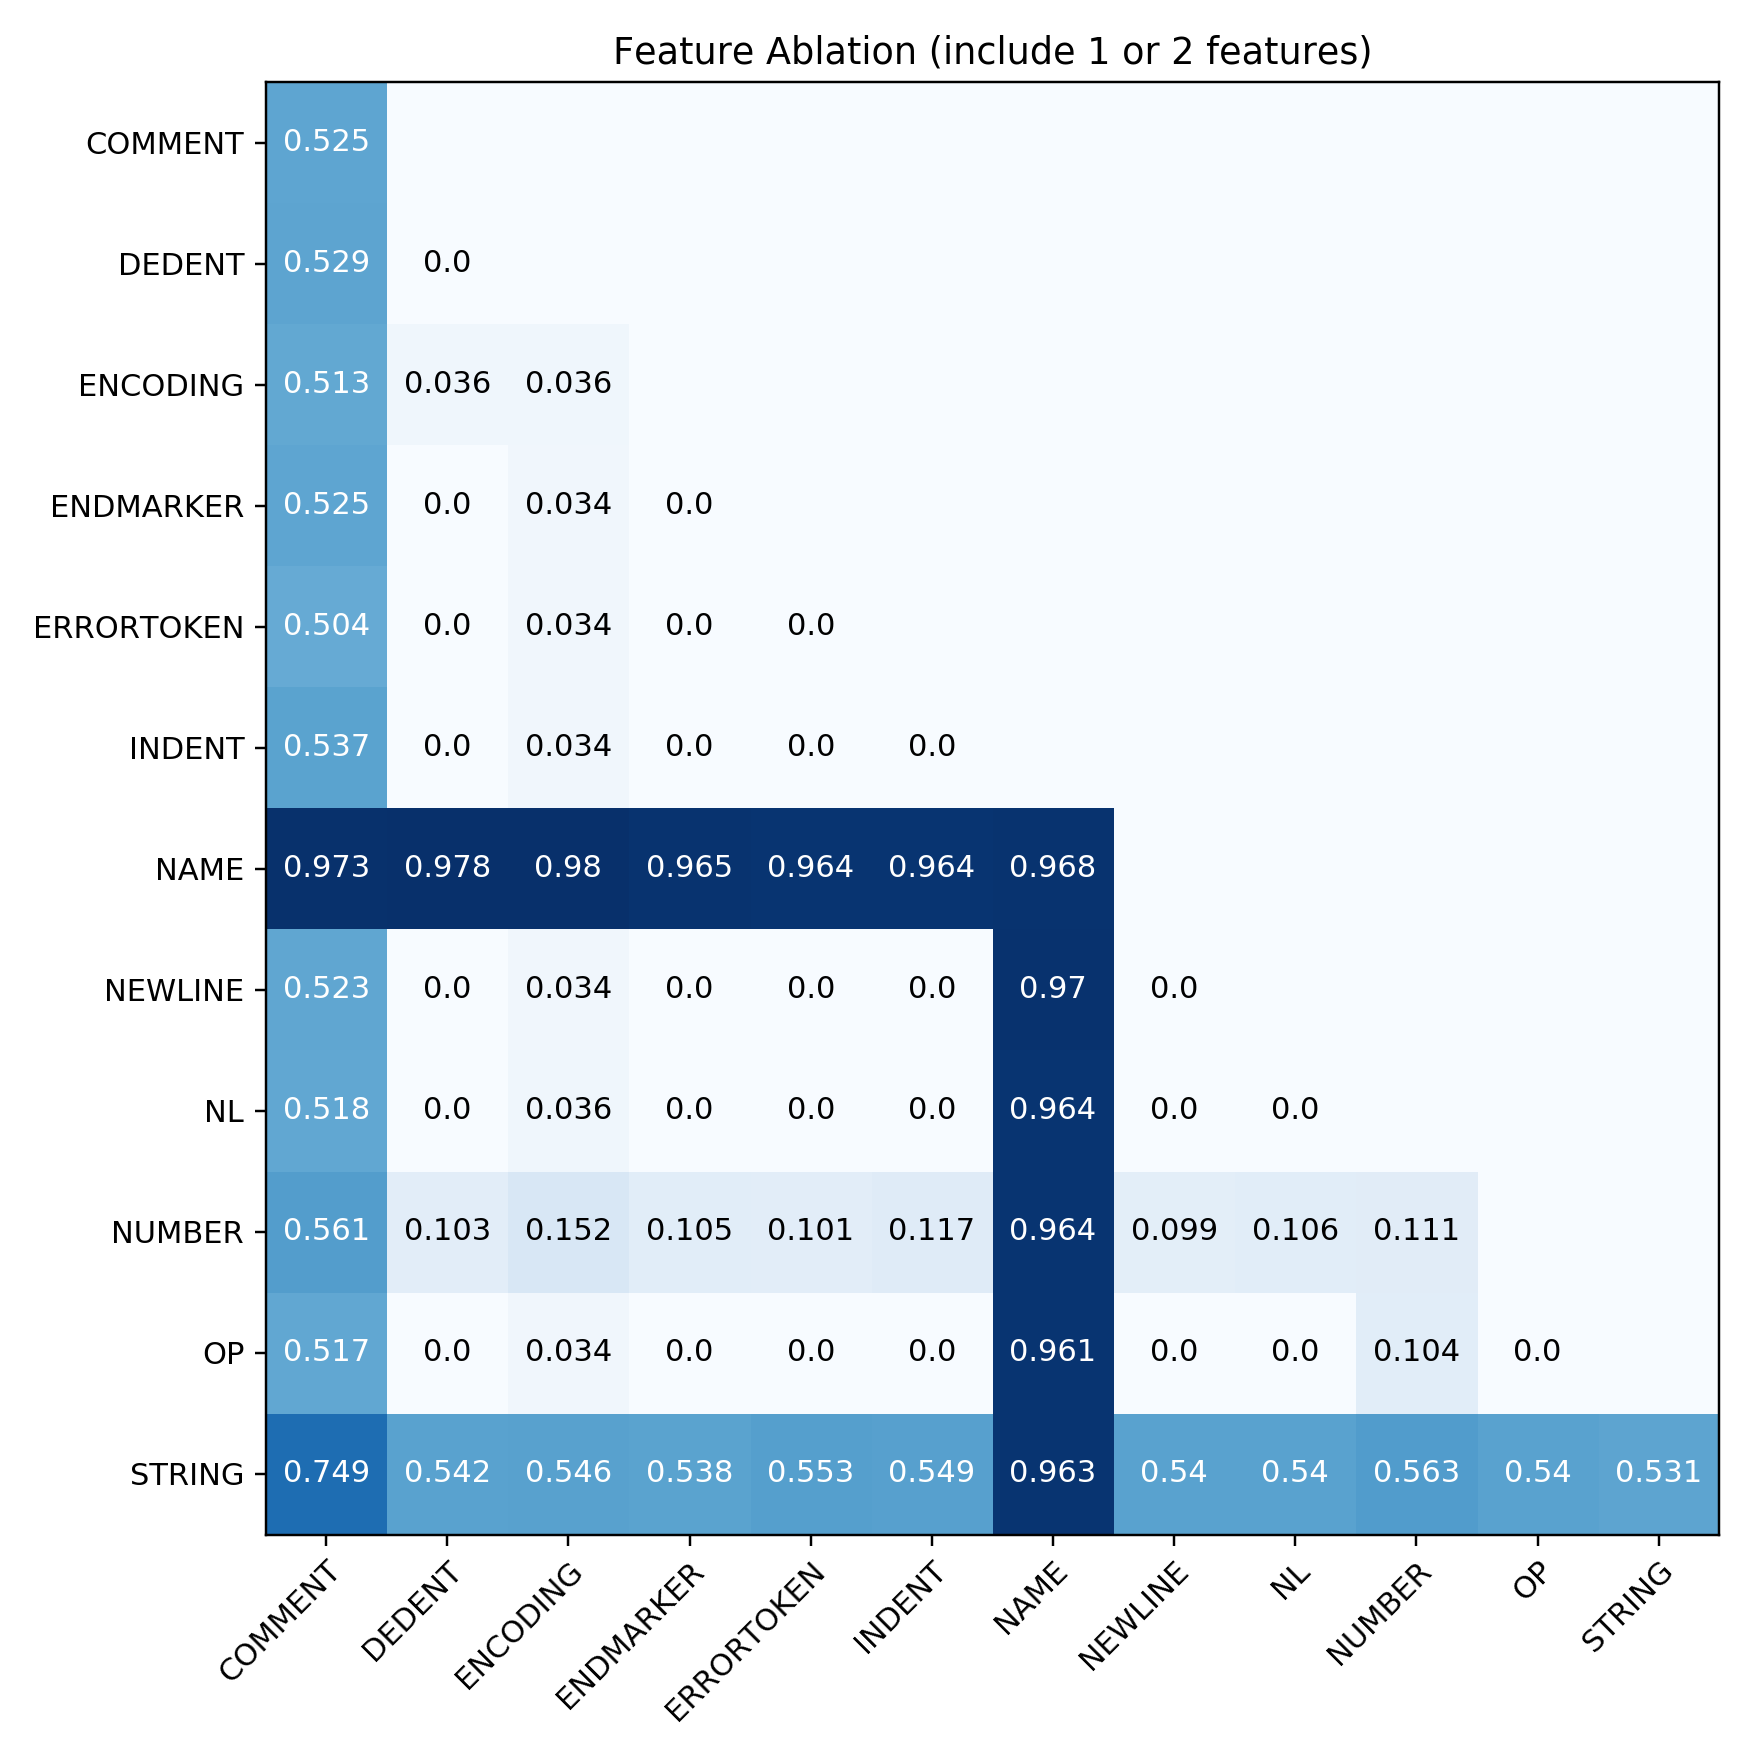

ERRORTOKEN,ENCODING
95


In [64]:
path = './experiments/results/ablation_include.txt'
records = readfile(path)
key = 'include_type'
grid = build_grid(records, key=key)


# Plot
fig = plt.figure(figsize=(8, 8))

# Heatmap.
# PuBu
plt.imshow(grid, aspect='auto', cmap=plt.get_cmap('Blues'))

# Accuracy.
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if i >= j:
            val = grid[i, j]
            color = 'w' if val > 0.5 else 'black'
            text = plt.text(j, i, val,
                           ha="center", va="center", color=color)

        
# ---- Aesthetics ---- #

ax = fig.get_axes()[0]

# We want to show all ticks...
ax.set_xticks(np.arange(grid.shape[0]))
ax.set_yticks(np.arange(grid.shape[1]))
# ... and label them with the respective list entries
ax.set_xticklabels(token_types_lst)
ax.set_yticklabels(token_types_lst)
        
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.title('Feature Ablation (include 1 or 2 features)')

plt.tight_layout()

plt.show()

print(records[-1]['options'][key])
print(len(records))

<IPython.core.display.Javascript object>


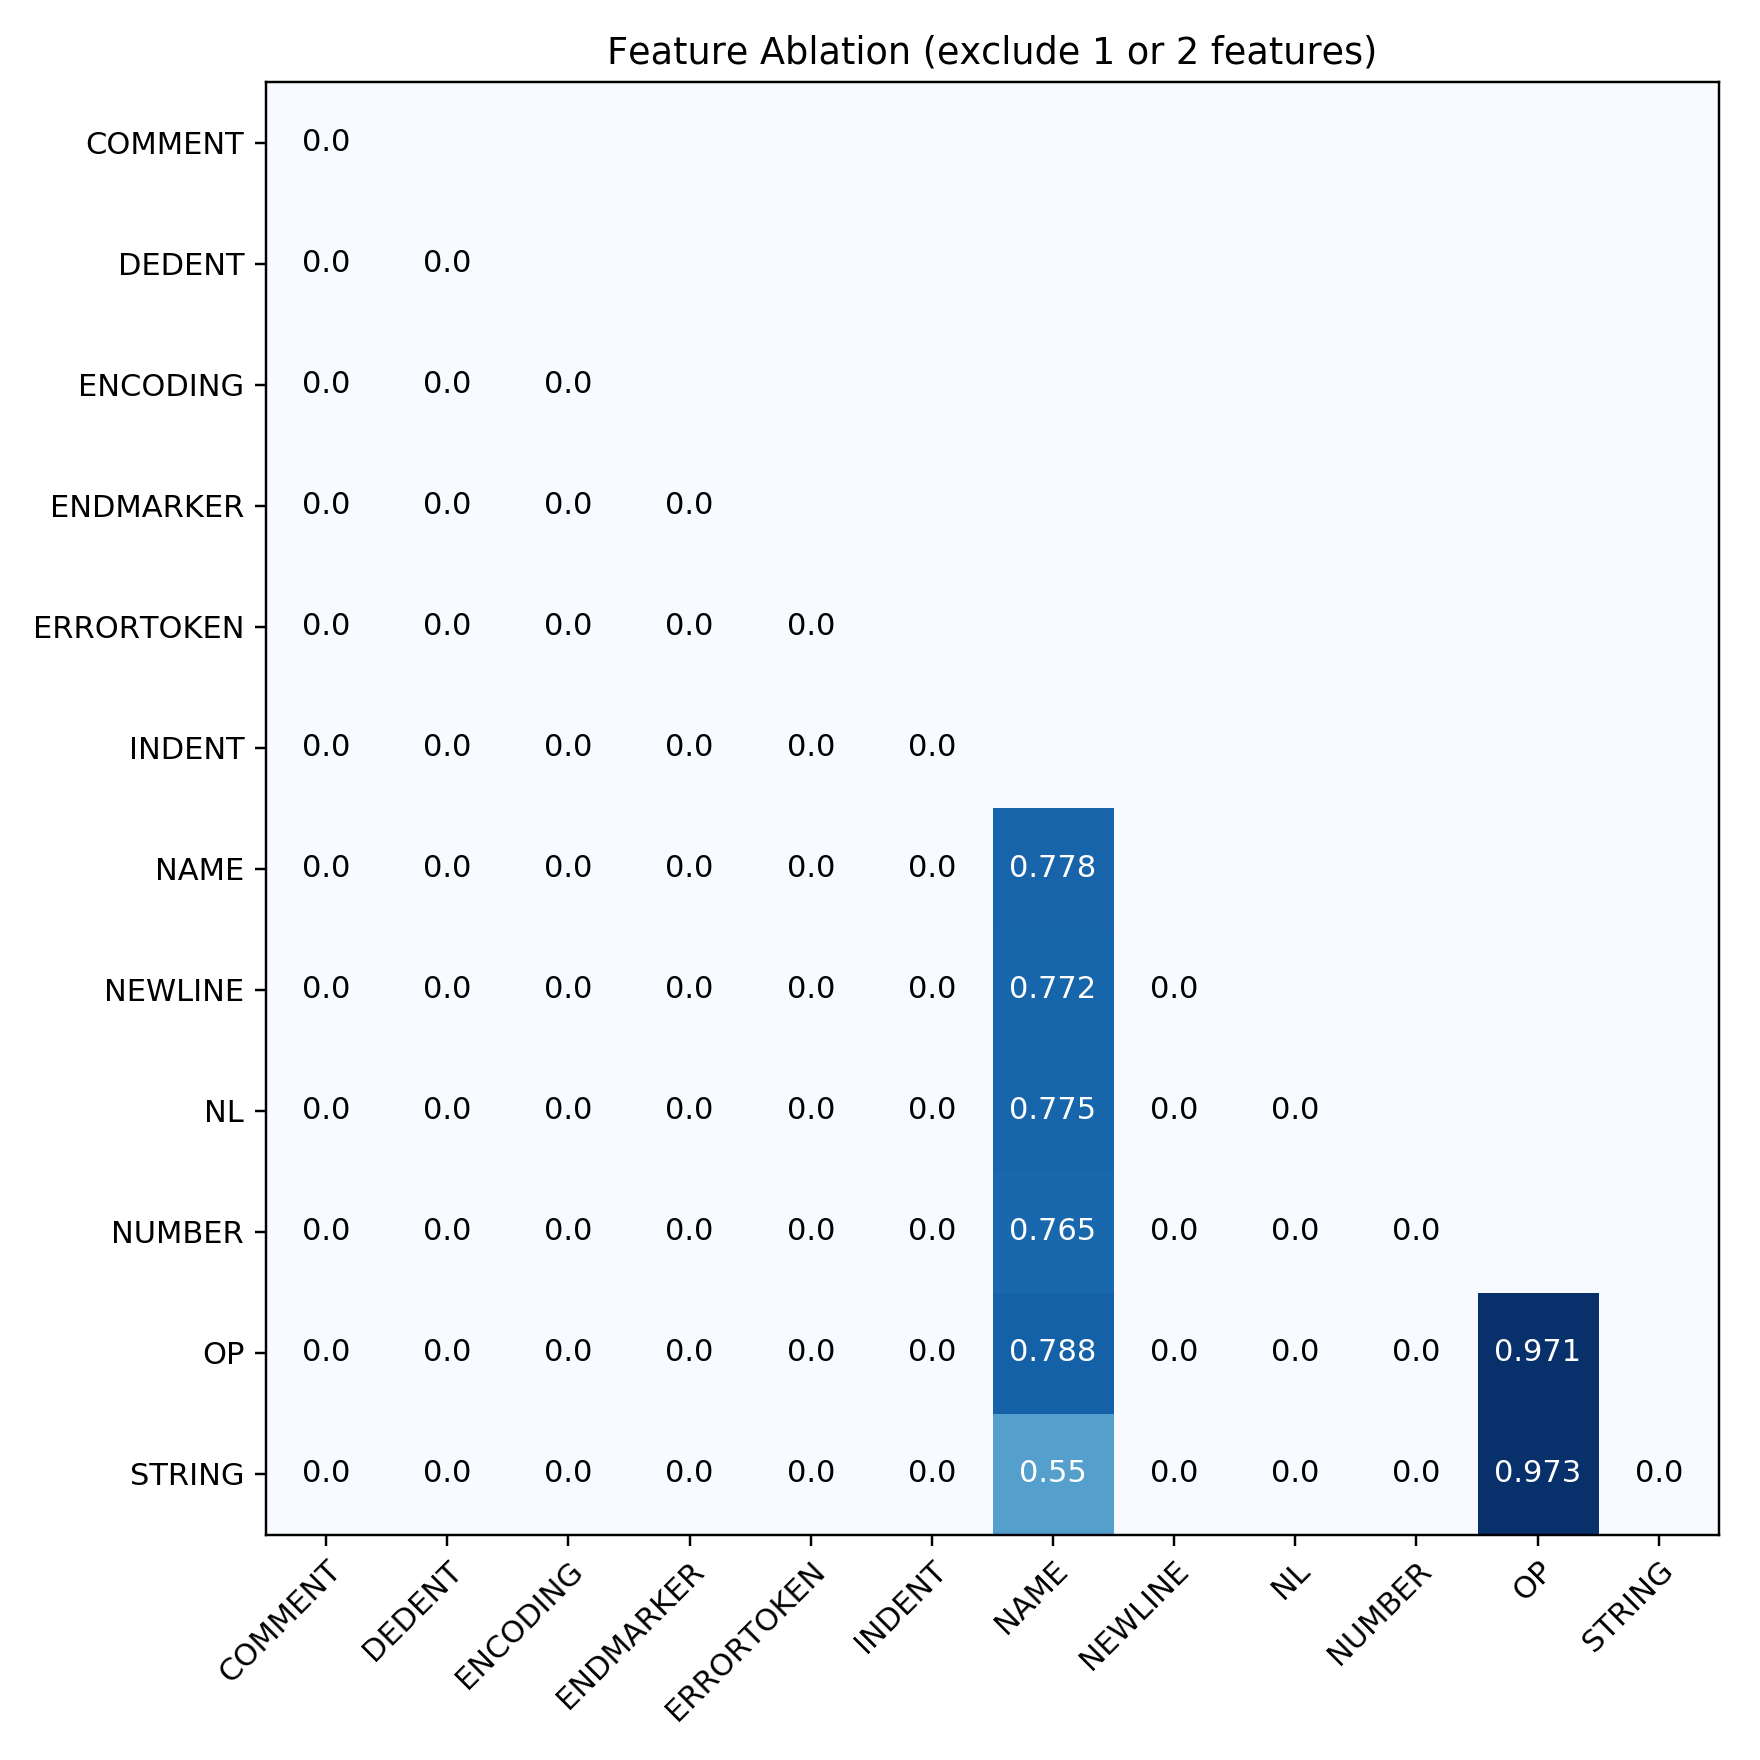

8
NAME,STRING


In [66]:
path = './experiments/results/ablation_exclude.txt'
records = readfile(path)
key = 'exclude_type'
grid = build_grid(records, key=key)


# Plot
fig = plt.figure(figsize=(8, 8))

# Heatmap.
# PuBu
plt.imshow(grid, aspect='auto', cmap=plt.get_cmap('Blues'))

# Accuracy.
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if i >= j:
            val = grid[i, j]
            color = 'w' if val > 0.5 else 'black'
            text = plt.text(j, i, val,
                           ha="center", va="center", color=color)

        
# ---- Aesthetics ---- #

ax = fig.get_axes()[0]

# We want to show all ticks...
ax.set_xticks(np.arange(grid.shape[0]))
ax.set_yticks(np.arange(grid.shape[1]))
# ... and label them with the respective list entries
ax.set_xticklabels(token_types_lst)
ax.set_yticklabels(token_types_lst)
        
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.title('Feature Ablation (exclude 1 or 2 features)')

plt.tight_layout()

plt.show()

print(len(records))
print(records[-1]['options'][key])
